In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
data = pd.read_excel("C:\Local Disk (A);\Excelr\Assignment Excelr\\18 Forecasting\CocaCola_Sales_Rawdata.xlsx")

# EDA

In [3]:
data.shape

(42, 2)

In [4]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [7]:
# Check null values
data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

# Visulization

<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

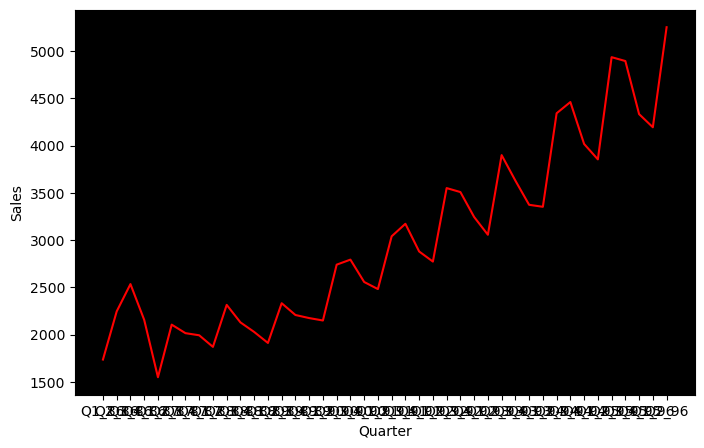

In [8]:
# Line Plot of passengers data
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_facecolor("black")
sns.lineplot(x = "Quarter",y = "Sales", data = data, color = "red")

<AxesSubplot:>

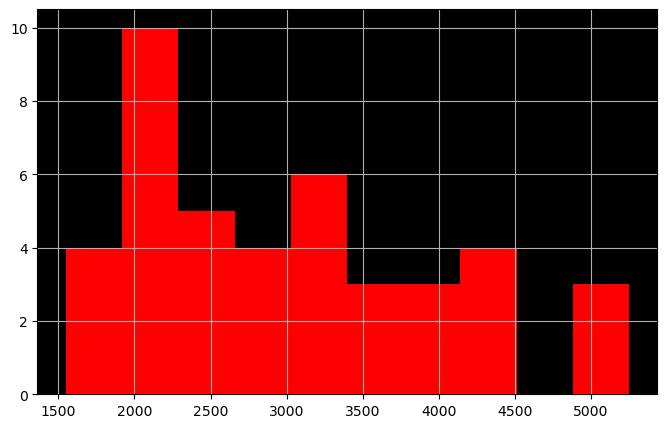

In [9]:
# Histogram
ax = plt.axes()
ax.set_facecolor("black")
data['Sales'].hist(figsize=(8,5), color = 'red')

<AxesSubplot:ylabel='Density'>

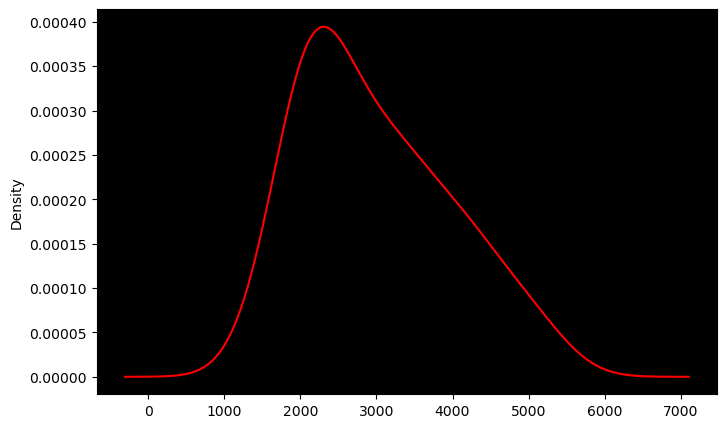

In [10]:
# Density Plot
ax = plt.axes()
ax.set_facecolor("black")
data['Sales'].plot(kind = 'kde', figsize=(8,5), color = 'red')

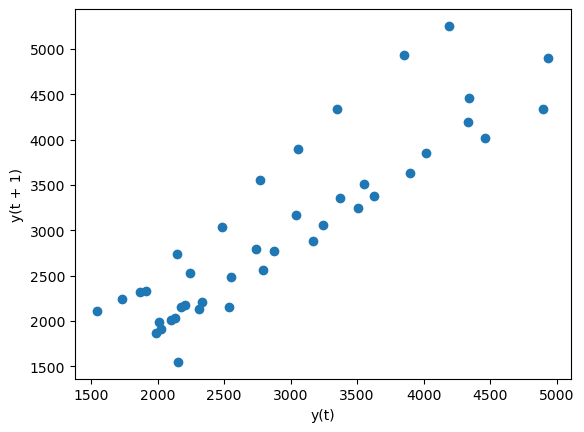

In [11]:
# Lagplot
from pandas.plotting import lag_plot

lag_plot(data['Sales'])
plt.show()

# Preprocessing Model

In [12]:
# Import Libraries
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
# Data preprocessing for models
data1 = data.copy()
data1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [14]:
# Splitting data into Train and Test (77/33)
Train = data1.head(32)
Test = data1.tail(10)

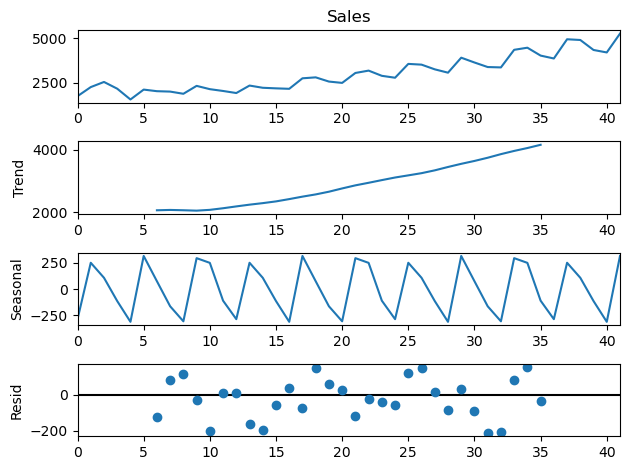

In [15]:
decompose_ts_add = seasonal_decompose(data1.Sales,period=12)
decompose_ts_add.plot()
plt.show()

In [16]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [17]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Sales, pred_ses)
rmse_ses_model

1034.9359056453961

In [18]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Sales, pred_hw)
rmse_hw_model

941.6367810616845

In [19]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add_model

633.4394050169811

In [20]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Sales, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

568.1679856842486

In [21]:
data = {"MODEL":pd.Series(["rmse_ses_model","rmse_hw_model","rmse_hwe_add_add_model","rmse_hwe_model_mul_add_model"]),"RMSE_Values":pd.Series([rmse_ses_model,rmse_hw_model,rmse_hwe_add_add_model,rmse_hwe_model_mul_add_model])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,rmse_hwe_model_mul_add_model,568.167986
2,rmse_hwe_add_add_model,633.439405
1,rmse_hw_model,941.636781
0,rmse_ses_model,1034.935906


# Model

In [22]:
# Data preprocessing for models
data2 = pd.read_excel("C:\Local Disk (A);\Excelr\Assignment Excelr\\18 Forecasting\CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0, parse_dates=True)
data2.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [23]:
data2["t"] = np.arange(1,43)
data2["t_squared"] = data2["t"]*data2["t"]
data2["sales_log"] = np.log(data2["Sales"])
data2.head()

,Sales,t,t_squared,sales_log
Quarter,,,,
Q1_86,1734.827000,1,1,7.458663
Q2_86,2244.960999,2,4,7.716443
Q3_86,2533.804993,3,9,7.837477
Q4_86,2154.962997,4,16,7.675529
Q1_87,1547.818996,5,25,7.344602


In [24]:
# Splitting data into Train and Test (77/33)
Train = data2.head(32)
Test = data2.tail(10)

In [25]:
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Sales'], pred_linear)
rmse_linear_model

752.9233932767132

In [26]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Sales'], pred_Quad)
rmse_Quad_model

457.7357355407399

In [27]:
Exp = smf.ols('sales_log~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_Exp_model

590.3316432076668

In [28]:
data = {"MODEL":pd.Series(["rmse_linear_model","rmse_Exp_model","rmse_Quad_model"]),"RMSE_Values":pd.Series([rmse_linear_model,rmse_Exp_model,rmse_Quad_model,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Quad_model,457.735736
1,rmse_Exp_model,590.331643
0,rmse_linear_model,752.923393


# ARIMA Model

In [29]:
data3 = pd.read_excel("C:\Local Disk (A);\Excelr\Assignment Excelr\\18 Forecasting\CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0, parse_dates=True)
data3.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [30]:
# separate out a validation dataset
split_point = len(data3) - 12
dataset, validation = data3[0:split_point], data3[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 30, Validation 12


In [31]:
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

In [32]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [33]:
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Name: 1, dtype: float64

In [34]:
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.715)
train, test = X[0:train_size], X[train_size:]

In [35]:
print(train.shape)
print(test.shape)

(21,)
(9,)


In [36]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
RMSE: 453.343


In [37]:
data = {"MODEL":pd.Series(["rmse_ses_model","rmse_hw_model","rmse_hwe_add_add_model","rmse_hwe_model_mul_add_model","rmse_linear_model","rmse_Exp_model","rmse_Quad_model","rmse_ARIMA"]),"RMSE_Values":pd.Series([rmse_ses_model,rmse_hw_model,rmse_hwe_add_add_model,rmse_hwe_model_mul_add_model,rmse_linear_model,rmse_Exp_model,rmse_Quad_model,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
7,rmse_ARIMA,453.343361
6,rmse_Quad_model,457.735736
3,rmse_hwe_model_mul_add_model,568.167986
5,rmse_Exp_model,590.331643
2,rmse_hwe_add_add_model,633.439405
4,rmse_linear_model,752.923393
1,rmse_hw_model,941.636781
0,rmse_ses_model,1034.935906
